<a href="https://colab.research.google.com/github/Eshwar-Naidus/task-1/blob/main/Task8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Advanced K-Means Task (Task 6/7) ---
Dataset loaded successfully.
Preprocessing 'Annual Income' and 'Spending Score'...

--- Step 2 (Guide 3): Finding Optimal K with Elbow Method ---
Saved Elbow plot to /content/mall_elbow_method.png
Displaying Elbow plot... (Optimal K is 5)


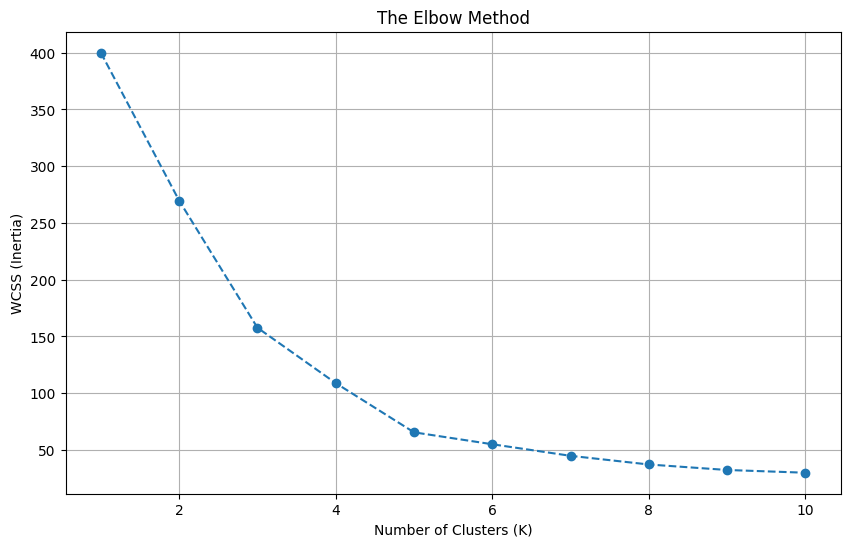


--- Step 3 (Guide 2): Fitting K-Means with K=5 ---
K-Means model (K=5) fitted and cluster labels assigned.

--- Step 4 (Guide 5): Evaluating with Silhouette Score ---
Silhouette Score for K=5: 0.5547

--- Step 5 (Guide 1 & 4): Visualizing Clusters with PCA ---

Saved PCA visualization plot to /content/mall_clusters_pca.png
Displaying PCA plot...


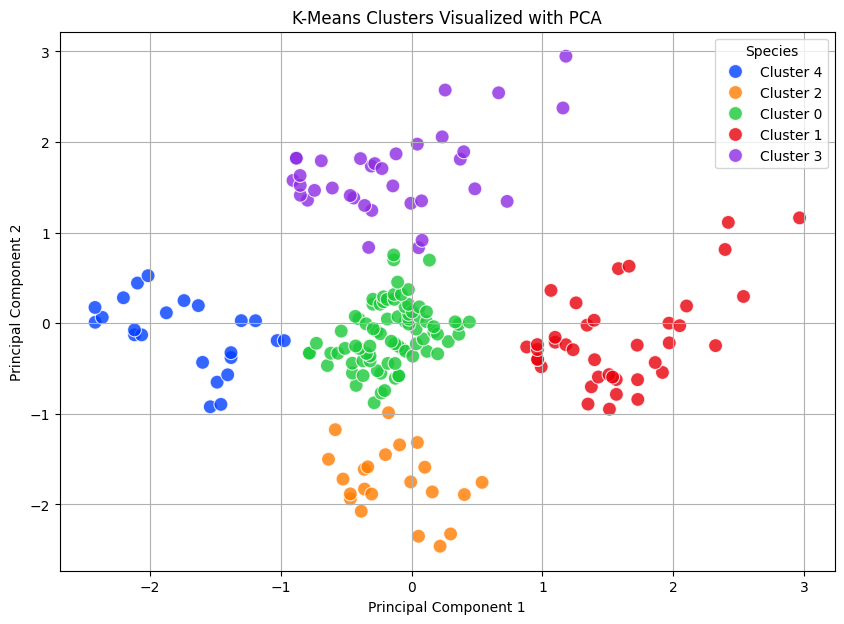


--- Task Complete ---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import os

print("--- Advanced K-Means Task (Task 6/7) ---")

# --- 1. Load and Prepare Dataset ---
DATASET_URL = "https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv"
try:
    df = pd.read_csv(DATASET_URL)
    print("Dataset loaded successfully.")
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()

# Select features and scale them
print("Preprocessing 'Annual Income' and 'Spending Score'...")
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 2. (Guide Step 3) Use Elbow Method to Find Optimal K ---
print("\n--- Step 2 (Guide 3): Finding Optimal K with Elbow Method ---")
wcss = []  # Within-Cluster Sum of Squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_) # Inertia is the WCSS

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
elbow_path = 'mall_elbow_method.png'
plt.savefig(elbow_path)
print(f"Saved Elbow plot to {os.path.abspath(elbow_path)}")
print("Displaying Elbow plot... (Optimal K is 5)")
plt.show() # <-- Display plot
plt.close()

# --- 3. (Guide Step 2) Fit K-Means with Optimal K ---
OPTIMAL_K = 5
print(f"\n--- Step 3 (Guide 2): Fitting K-Means with K={OPTIMAL_K} ---")
kmeans_model = KMeans(n_clusters=OPTIMAL_K, init='k-means++', random_state=42, n_init=10)
# Fit and assign cluster labels
y_kmeans = kmeans_model.fit_predict(X_scaled)
df['Cluster'] = y_kmeans # Add cluster labels to original df
print(f"K-Means model (K={OPTIMAL_K}) fitted and cluster labels assigned.")

# --- 4. (Guide Step 5) Evaluate using Silhouette Score ---
print("\n--- Step 4 (Guide 5): Evaluating with Silhouette Score ---")
# Silhouette score measures how similar an object is to its own cluster
# (cohesion) compared to other clusters (separation).
# Score is from -1 (bad) to +1 (good).
score = silhouette_score(X_scaled, y_kmeans)
print(f"Silhouette Score for K={OPTIMAL_K}: {score:.4f}")

# --- 5. (Guide Step 1 & 4) Visualize Clusters using PCA ---
print("\n--- Step 5 (Guide 1 & 4): Visualizing Clusters with PCA ---")
# Use PCA to reduce the 2D scaled data to 2 components for visualization
# (In this case, it's 2D -> 2D, but it's good practice)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(data=X_pca, columns=['PC 1', 'PC 2'])
pca_df['Cluster'] = y_kmeans
pca_df['Species'] = df['Cluster'].map({
    0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2', 3: 'Cluster 3', 4: 'Cluster 4'
})

# Plot the 2 PCA components
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=pca_df,
    x='PC 1',
    y='PC 2',
    hue='Species',
    palette=sns.color_palette('bright', n_colors=OPTIMAL_K),
    s=100,
    alpha=0.8
)
plt.title('K-Means Clusters Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
pca_plot_path = 'mall_clusters_pca.png'
plt.savefig(pca_plot_path)
print(f"\nSaved PCA visualization plot to {os.path.abspath(pca_plot_path)}")
print("Displaying PCA plot...")
plt.show() # <-- Display plot
plt.close()

#print("\n--- Task Complete ---")